In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/Online Retail.xlsx")

In [ ]:
df.dropna(subset=['CustomerID', 'Description'], inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [ ]:
df['Month'] = df['InvoiceDate'].dt.month


In [ ]:
df['Year'] = df['InvoiceDate'].dt.year


In [ ]:
df['Quarter'] = df['InvoiceDate'].dt.quarter


In [ ]:
df['is_return'] = df['Quantity'] < 0


In [ ]:
profit_per_product = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)


In [ ]:
least_profit_products = df.groupby('Description')['TotalPrice'].sum().sort_values().head(10)


In [ ]:
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)


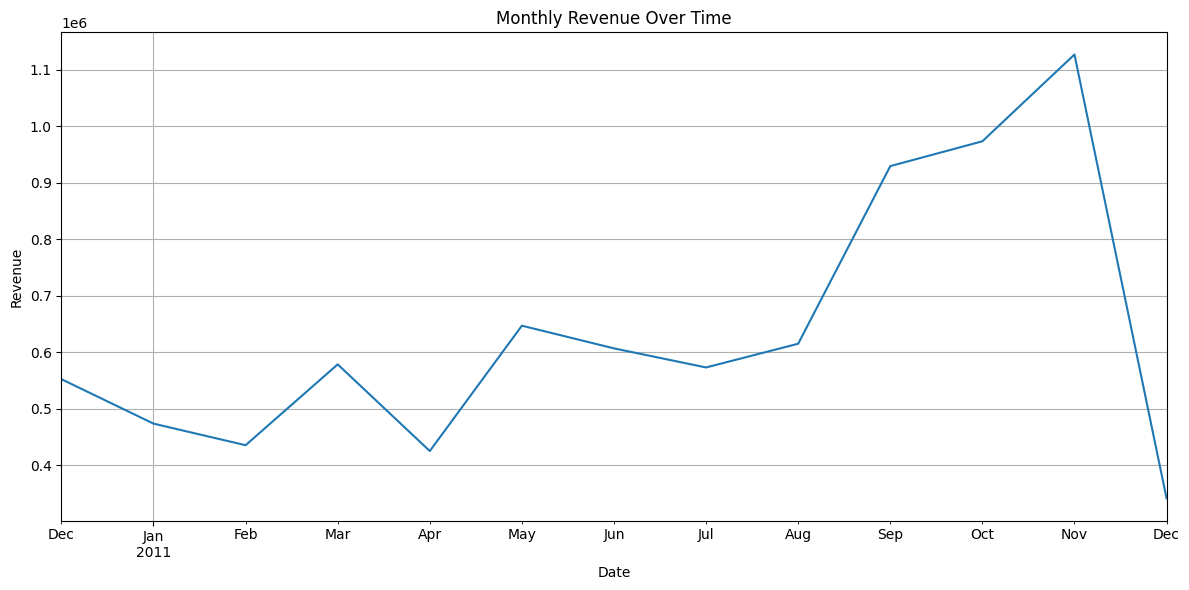

In [ ]:
# Plot revenue trend
plt.figure(figsize=(12, 6))
monthly_revenue.plot()
plt.title('Monthly Revenue Over Time')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid()
plt.tight_layout()
plt.savefig('monthly_revenue_trend.png')

In [ ]:
seasonal_revenue = df.groupby('Month')['TotalPrice'].sum()

In [ ]:
product_freq = df['Description'].value_counts()


In [ ]:
df_returns = df[df['is_return'] == True]


In [ ]:
top_returns = df_returns.groupby('Description')['Quantity'].count().sort_values(ascending=False).head(10)


In [ ]:
returns_by_country = df_returns.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)


In [ ]:
df.to_csv('cleaned_retail_data.csv', index=False)
monthly_revenue.to_csv('monthly_revenue.csv')
profit_per_product.to_csv('top_products.csv')
country_revenue.to_csv('country_revenue.csv')

top_returns.to_csv('top_returned_products.csv')
returns_by_country.to_csv('returns_by_country.csv')